In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline

In [2]:
!pip install umap-learn

     |████████████████████████████████| 88 kB 4.5 MB/s 
     |████████████████████████████████| 1.1 MB 43.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=19114a705a742b4032f3fb390e823396aa8bdafd49b1644cc68d3b1f341a4b1f
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=68f67d611f4d147555973c22f6229c72784cdea5dfe3964202d5fdd0fa18ddf3
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/metric_learning

/content/drive/MyDrive/metric_learning


In [6]:
!pip install pytorch-metric-learning
!pip install powerful-benchmarker

     |████████████████████████████████| 109 kB 7.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 94 kB 2.2 MB/s 
     |████████████████████████████████| 85.5 MB 95 kB/s 
     |████████████████████████████████| 993 kB 46.3 MB/s 
     |████████████████████████████████| 58 kB 6.4 MB/s 
     |████████████████████████████████| 596 kB 37.5 MB/s 
     |████████████████████████████████| 363 kB 58.6 MB/s 
     |████████████████████████████████| 713 kB 58.8 MB/s 
     |████████████████████████████████| 310 kB 62.0 MB/s 
  Created wheel for gpytorch: filename=gpytorch-1.6.0-py2.py3-none-any.whl size=509889 sha256=a47614591aff37843f9199cea1728f68453964b28cf18ca10c8cf2497639ac42
  Stored in directory: /root/.cache/pip/wheels/66/b5/89/34c06ad393a6feb72b4cdde46d0f1c667f3e2632960f9df109
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=912411eed98e89eed746ffd4a7c915bf1201dd3ddaac3f4d618fe5c9e

In [7]:
from utils import Cars196, CUB200

In [8]:
dataset_cub = CUB200('datasets/', download = False)
dataset_cars = Cars196('datasets/', download = False)

In [8]:
# sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

In [9]:
import pickle
import os
embeddings = {}
for filename in os.listdir('embeddings'):
    with open('embeddings/' + filename, 'rb') as f:
        embeddings[filename.split('.')[0]] = pickle.load(f)

In [10]:
embeddings.keys()

dict_keys(['embeddings_cars', 'embeddings_cub', 'fid_base_dist_loss_embeddings_cars', 'fid_base_dist_loss_embeddings_cub', 'join_training_embeddings_cub', 'join_training_embeddings_cars', 'join_with_teacher_l2_loss_embeddings_cub', 'join_with_teacher_l2_loss_embeddings_cars', 'kd_loss_embeddings_cub', 'kd_loss_embeddings_cars'])

In [10]:
from cycler import cycler


def visualizer_hook(umap_embeddings, labels):
    label_set = np.unique(labels)
    num_classes = len(label_set)
    fig = plt.figure(figsize=(20, 13))
    plt.gca().set_prop_cycle(
        cycler(
            "color", [plt.cm.nipy_spectral(i) for i in np.linspace(0, 0.9, num_classes)]
        )
    )
    for i in range(num_classes):
        idx = labels == label_set[i]
        plt.plot(umap_embeddings[idx, 0], umap_embeddings[idx, 1], ".", markersize=5)
    plt.show()

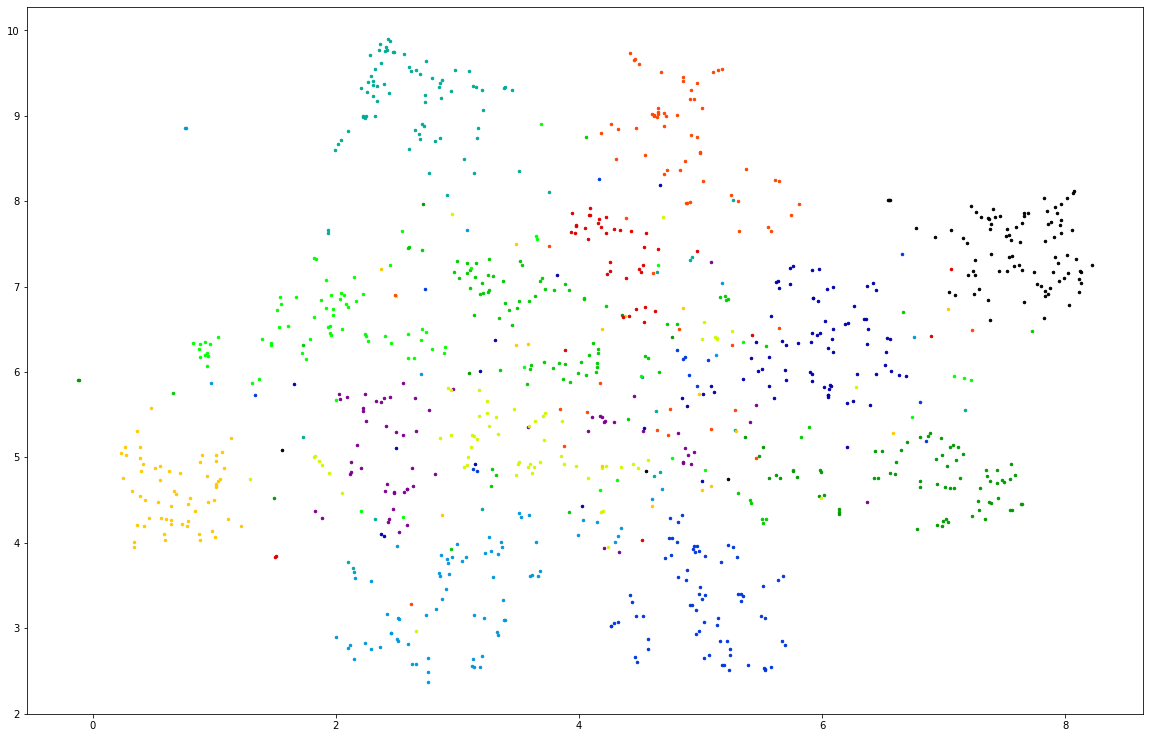

In [42]:
size = 1000
fit = umap.UMAP(n_components=2)
u_cars = fit.fit_transform(embeddings['embeddings_cars'][:size], y = dataset_cars.labels[:size])
visualizer_hook(u_cars, dataset_cars.labels[:size])

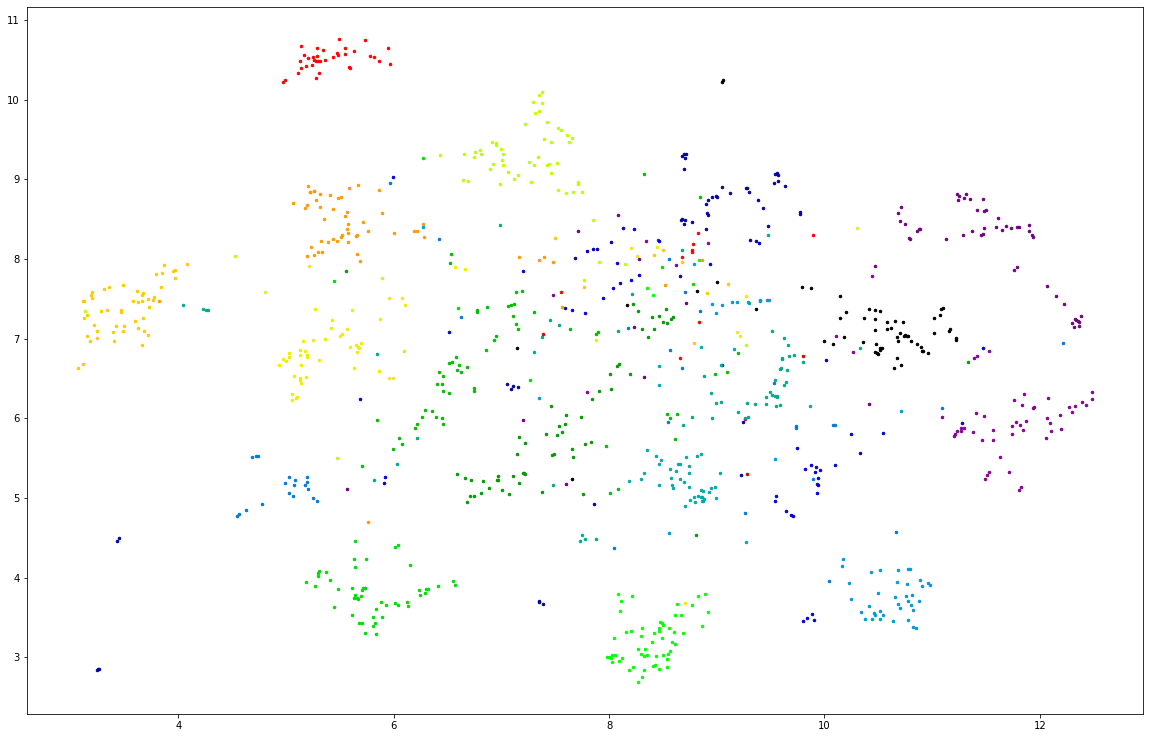

In [43]:
fit = umap.UMAP(n_components=2)
u_cub = fit.fit_transform(embeddings['embeddings_cub'][:size], y = dataset_cub.labels[:size])
visualizer_hook(u_cub, dataset_cub.labels[:size])

In [44]:
visualizer_hook(np.concatenate([u_cars,u_cub]) , np.concatenate([dataset_cars.labels[:size], dataset_cub.labels[:size]+196]))

In [12]:
size = 1000
fit = umap.UMAP(n_components=2)
u_cat = fit.fit_transform(np.concatenate([embeddings['embeddings_cars'][:size],
                                         embeddings['embeddings_cub'][:size]]) , y = np.concatenate([dataset_cars.labels[:size], dataset_cub.labels[:size]+196]))
visualizer_hook(u_cat, np.concatenate([dataset_cars.labels[:size], dataset_cub.labels[:size]+196]))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
